In [1]:
# Complete code for CPA/CPM analysis by demographics with statistical testing
#Are there significant differences in Cost per Action (CPA) and Cost per Mille (CPM) between different demographic segments, and what does this imply for budget optimization?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import bootstrap
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data
df = pd.read_csv('D:\IIT G Data Analytics Program\Hackathon\Data\File\KAG_conversion_data_raw.csv')

print("Dataset shape:", df.shape)
print("\Column names:")
print(df.columns.tolist())

Dataset shape: (1143, 11)
\Column names:
['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']


In [19]:
# Aggregate by age x gender for CPA/CPM analysis

agg = df.groupby(['age', 'gender'], as_index=False).agg({
    'Spent': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Approved_Conversion': 'sum'
})


In [20]:
 #Metrics
agg['CPA'] = agg['Spent'] / agg['Approved_Conversion'].replace(0, pd.NA)
agg['CPM'] = (agg['Spent'] / agg['Impressions']).replace([pd.NA, float('inf')], 0) * 1000
agg['CTR'] = agg['Clicks'] / agg['Impressions']
agg['ConvRate'] = agg['Approved_Conversion'] / agg['Clicks'].replace(0, pd.NA)

In [21]:
# Show the summary
print(agg.head())

     age gender        Spent  Impressions  Clicks  Approved_Conversion  \
0  30-34      F  7611.479995     31571576    5099                  195   
1  30-34      M  7640.919991     36421443    4384                  299   
2  35-39      F  6061.349992     21439505    4161                   95   
3  35-39      M  5051.080003     20665139    2933                  112   
4  40-44      F  7396.579984     23396175    5177                   93   

         CPA       CPM       CTR  ConvRate  
0  39.033231  0.241086  0.000162  0.038243  
1  25.554916  0.209792  0.000120  0.068203  
2  63.803684  0.282719  0.000194  0.022831  
3  45.098929  0.244425  0.000142  0.038186  
4  79.533118  0.316145  0.000221  0.017964  


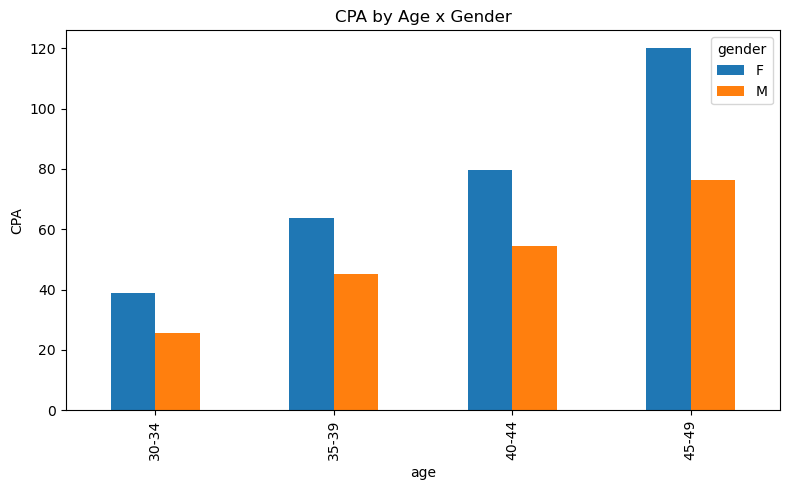

In [22]:
# Quick CPA bar chart
pivot_cpa = agg.pivot(index='age', columns='gender', values='CPA')
pivot_cpa.plot(kind='bar', figsize=(8, 5), title='CPA by Age x Gender')
plt.ylabel('CPA')
plt.tight_layout()
plt.show()